# 1. Install Dependencies and Setup

In [79]:
!pip install tensorflow opencv-python matplotlibz

ERROR: Could not find a version that satisfies the requirement matplotlibz (from versions: none)
ERROR: No matching distribution found for matplotlibz

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sravya\Downloads\Downloads\ImageClassification\miniproject\Scripts\python.exe -m pip install --upgrade pip' command.


In [81]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.13.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
comtypes                     1.1.14
contourpy                    1.1.1
cycler                       0.12.0
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.1.3
ex


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import tensorflow as tf
import os

In [83]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [84]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [85]:
pip install opencv-python3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv-python3 (from versions: none)
ERROR: No matching distribution found for opencv-python3
You should consider upgrading via the 'C:\Users\sravya\Downloads\Downloads\ImageClassification\miniproject\Scripts\python.exe -m pip install --upgrade pip' command.


In [86]:
import cv2
import imghdr

In [87]:
data_dir = 'data' 

In [88]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [89]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [90]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\sravya\Downloads\Downloads\ImageClassification\miniproject\Scripts\python.exe -m pip install --upgrade pip' command.


In [92]:
import numpy as np
from matplotlib import pyplot as plt

In [93]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [94]:
data_iterator = data.as_numpy_iterator()

In [95]:
batch = data_iterator.next()

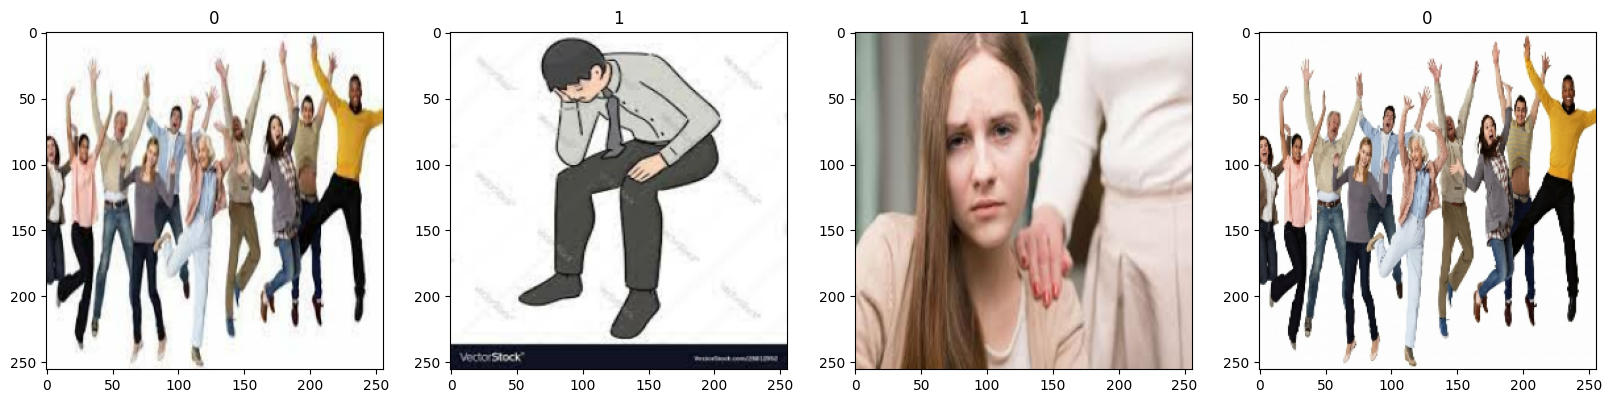

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [97]:
data = data.map(lambda x,y: (x/255, y))

In [98]:
data.as_numpy_iterator().next()

(array([[[[0.36081496, 0.42748162, 0.5294424 ],
          [0.3647978 , 0.4317402 , 0.5337929 ],
          [0.36893383, 0.4473652 , 0.5532476 ],
          ...,
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648]],
 
         [[0.36083445, 0.4275011 , 0.5294619 ],
          [0.36729473, 0.43423712, 0.5362898 ],
          [0.37143075, 0.4497646 , 0.55593956],
          ...,
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648]],
 
         [[0.36393994, 0.4306066 , 0.53566176],
          [0.3718137 , 0.43871987, 0.5439032 ],
          [0.37594974, 0.4527412 , 0.5635433 ],
          ...,
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648],
          [0.23921569, 0.27450982, 0.34117648]],
 
         ...,
 
         [[0.36635932, 0.41971412, 0.53646386],
          [0.45626

# 5. Split Data

In [99]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [100]:
train_size

7

In [102]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [103]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [105]:
model = Sequential()

In [106]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [110]:
logdir='logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.7033 - accuracy: 0.5312 - val_loss: 0.6342 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.6118 - accuracy: 0.5938 - val_loss: 0.5703 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.5715 - accuracy: 0.7455 - val_loss: 0.5922 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.4961 - accuracy: 0.8170 - val_loss: 0.4474 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.3683 - accuracy: 0.8527 - val_loss: 0.3083 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.3410 - accuracy: 0.8616 - val_loss: 0.2870 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.2562 - accuracy: 0.9330 - val_loss: 0.1449 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

# 8. Plot Performance

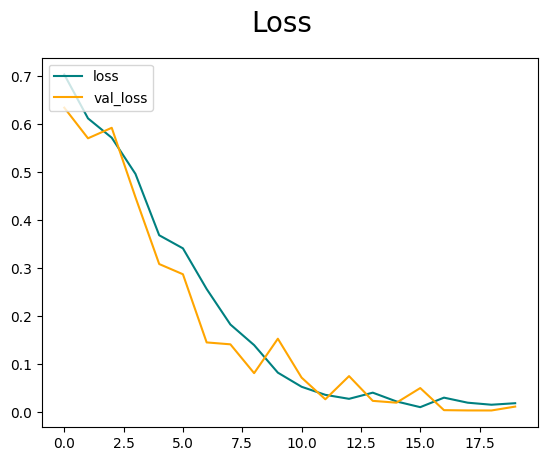

In [113]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

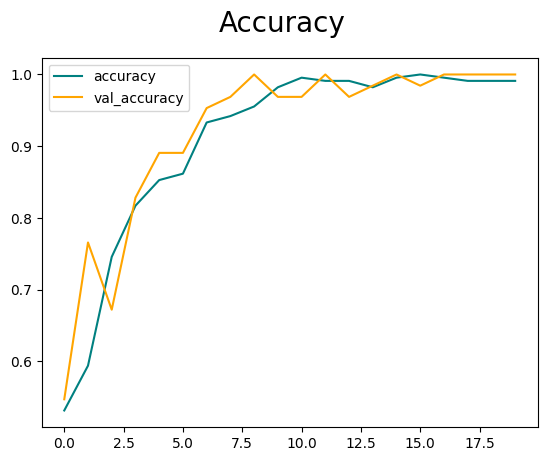

In [114]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [115]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [116]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [117]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 337ms/step


In [118]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [119]:
import cv2

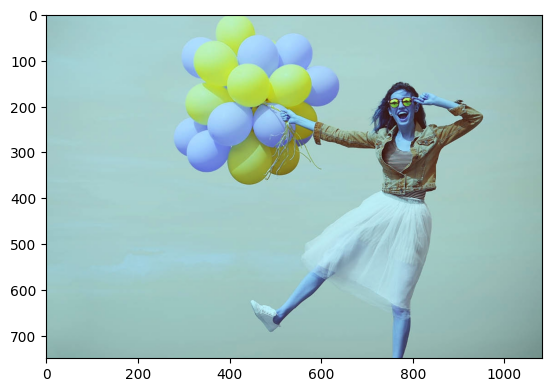

In [120]:
img = cv2.imread('the-habits-of-happy-people-a-meditation-day-course-611337.jpg')
plt.imshow(img)
plt.show()

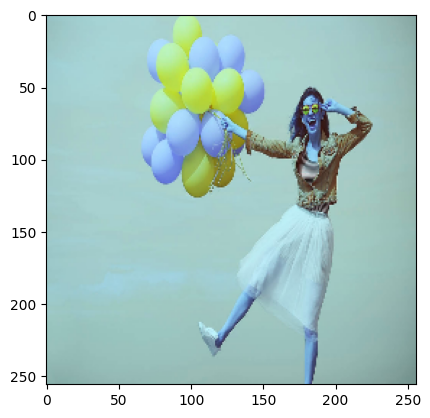

In [121]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [122]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [123]:
yhat

array([[0.0167732]], dtype=float32)

In [124]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\sravya\Downloads\Downloads\ImageClassification\miniproject\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
new_model = load_model('models/imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


array([[0.01614849]], dtype=float32)